In [ ]:
#end to end nlp project
#emotion detection in text
#Text classifier    

In [ ]:
pip install neattext

In [ ]:
pip install eli5 lime

In [10]:
pip install -U scikit-learn

In [17]:
pip install sklearn 

In [ ]:
pip install dalex spacy seaborn altair streamlit

In [20]:
from sklearn.naive_bayes import MultinomialNB

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
#test clean pkgs
import neattext.functions as nfx
#ML pkgs and estimators
from sklearn.linear_model import LogisticRegression

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [23]:
# Load Dataset
df = pd.read_csv("emotion_dataset_2.csv")

In [24]:
#explore the dataset
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [26]:
df["Emotion"].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

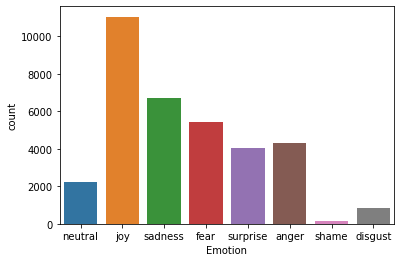

In [28]:
#plot
sns.countplot(x='Emotion',data=df)

In [ ]:
#cleaning
dir(nfx)

In [30]:
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [31]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [ ]:
df.head(20)

In [35]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [36]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [37]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [38]:
# LogisticRegression Pipeline
#Convert a collection of text documents to a matrix of token counts. 
#This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [39]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [40]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [41]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.6200421536692853

In [43]:
# Make A Prediction
ex1 = "This book was so interesting it made me happy"
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [44]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[1.60400188e-03, 7.06107105e-03, 6.95869391e-03, 9.43791201e-01,
        1.00434039e-04, 2.63452144e-02, 6.64720844e-05, 1.40729114e-02]])

In [45]:
# To Know the classes
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [47]:
# Save Model & Pipeline
import joblib
pipeline_file = open("emotion_classifier_pipe_lr_03_2022.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()